## Data Mining Task Solution

In [184]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [130]:
data=pd.read_csv("data.csv")  #loading data

In [131]:
data.head()   #top 5 rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [132]:
data.shape

(569, 33)

In [133]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [134]:
data.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [136]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [137]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [138]:
data['diagnosis']=data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [139]:
y=data.loc[:,'diagnosis']
X=data.loc[:,'radius_mean':'fractal_dimension_worst']

In [140]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [141]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [142]:
standardize=StandardScaler()

In [143]:
X_scaled=standardize.fit_transform(X)

## PCA

In [147]:
#https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html
fa = FactorAnalyzer()
fa.fit(X_scaled)
eigen_v, v =fa.get_eigenvalues()
eigen_v

array([1.32816077e+01, 5.69135461e+00, 2.81794898e+00, 1.98064047e+00,
       1.64873055e+00, 1.20735661e+00, 6.75220114e-01, 4.76617140e-01,
       4.16894812e-01, 3.50693457e-01, 2.93915696e-01, 2.61161370e-01,
       2.41357496e-01, 1.57009724e-01, 9.41349650e-02, 7.98628010e-02,
       5.93990378e-02, 5.26187835e-02, 4.94775918e-02, 3.11594025e-02,
       2.99728939e-02, 2.74394025e-02, 2.43408378e-02, 1.80550070e-02,
       1.54812714e-02, 8.17763986e-03, 6.90046388e-03, 1.58933787e-03,
       7.48803097e-04, 1.33044823e-04])

Hence by Kaiser rule as seen from above eigen vector only 6 factors are greater than 1

In [148]:
pca=PCA()

In [149]:
pca=pca.fit_transform(X)

In [150]:
pca.shape

(569, 30)

In [151]:
pca_data=pca[:,:6]

In [152]:
pca_data.shape

(569, 6)

In [153]:
final_pca_df = pd.DataFrame( data = pca_data,columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6'])

In [154]:
final_pca_df["class"]=data['diagnosis']

In [155]:
final_pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,class
0,1160.142574,-293.917544,48.578398,-8.711975,32.000486,1.265415,1
1,1269.122443,15.630182,-35.394534,17.861283,-4.334874,-0.225872,1
2,995.793889,39.156743,-1.709753,4.199340,-0.466529,-2.652811,1
3,-407.180803,-67.380320,8.672848,-11.759867,7.115461,1.299436,1
4,930.341180,189.340742,1.374801,8.499183,7.613289,1.021160,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A5C3714780>,
      dtype=object)

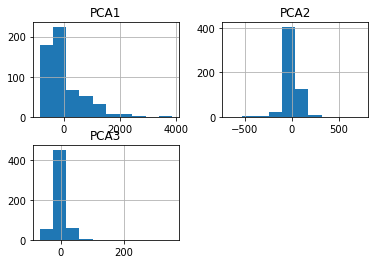

In [185]:
final_pca_df.hist(column=["PCA1", "PCA2","PCA3"])  #Histogram of first three components

As seen from above plot PCA1 has maximum spread or variance. More the variance more the information.

In [157]:
new_final_pca_df=final_pca_df[['PCA1','PCA2','PCA3','class']]

In [158]:
new_final_pca_df.head()

,PCA1,PCA2,PCA3,class
0,1160.142574,-293.917544,48.578398,1
1,1269.122443,15.630182,-35.394534,1
2,995.793889,39.156743,-1.709753,1
3,-407.180803,-67.380320,8.672848,1
4,930.341180,189.340742,1.374801,1


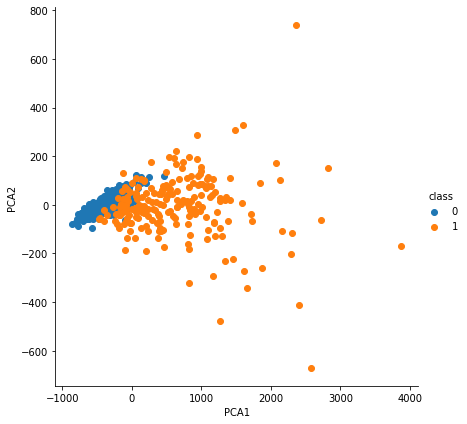

In [159]:
sns.FacetGrid(new_final_pca_df, hue="class", size=6).map(plt.scatter, 'PCA1', 'PCA2').add_legend()
plt.show()

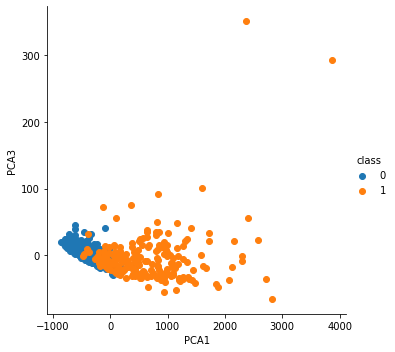

In [160]:
sns.FacetGrid(new_final_pca_df, hue="class", size=5).map(plt.scatter, 'PCA1', 'PCA3').add_legend()
plt.show()

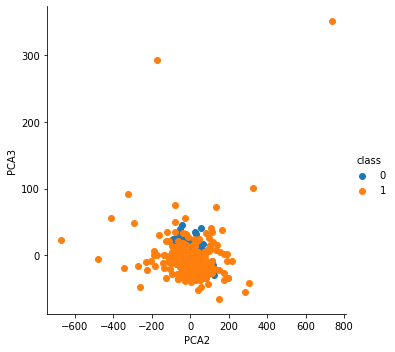

In [161]:
sns.FacetGrid(new_final_pca_df, hue="class", size=5).map(plt.scatter, 'PCA2', 'PCA3').add_legend()
plt.show()

From above 3 plot 1 i.e PCA1 vs PCA2 has better class seperation than other other two plots. for plot 3 i,e PCA2 vs PCA3 there is overlap of classes.

Hence by using PCA we have brought down 30 dimensions data to 6 dimensions using kaiser rule an then to 2 Dimensions.

## K-means Clustering

In [162]:
kmeans_data=final_pca_df[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']]

In [163]:
kmeans_data.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
0,1160.142574,-293.917544,48.578398,-8.711975,32.000486,1.265415
1,1269.122443,15.630182,-35.394534,17.861283,-4.334874,-0.225872
2,995.793889,39.156743,-1.709753,4.199340,-0.466529,-2.652811
3,-407.180803,-67.380320,8.672848,-11.759867,7.115461,1.299436
4,930.341180,189.340742,1.374801,8.499183,7.613289,1.021160


In [183]:
k=[2,3,5]
for i in k:
    kmeans=KMeans(n_clusters=i,random_state=10)
    kmeans.fit(kmeans_data)
    cluster=kmeans.labels_
    centroid=kmeans.cluster_centers_
    db=davies_bouldin_score(kmeans_data,cluster)
    print("for k= {0}, centroid is {1} davies_bouldin_score is {2}".format(i,centroid,db))
    print("*"*90)

for k= 2, centroid is [[-3.06510219e+02 -4.74773896e-01  5.48852886e-01  1.15257639e-01
  -4.57112668e-02 -2.43422772e-02]
 [ 1.02482043e+03  1.58741196e+00 -1.83509591e+00 -3.85365236e-01
   1.52836144e-01  8.13886827e-02]] davies_bouldin_score is 0.5043916220325669
******************************************************************************************
for k= 3, centroid is [[ 7.49742914e+02  1.07624780e+01 -7.97105601e+00 -2.61761785e+00
   1.29941731e+00 -1.43161829e-01]
 [-3.24356902e+02 -9.14770498e-01  9.89080512e-01  2.43018961e-01
  -8.09741014e-02 -1.89279179e-02]
 [ 2.04925176e+03 -3.97166248e+01  2.36581982e+01  9.28037831e+00
  -5.33980442e+00  1.10291071e+00]] davies_bouldin_score is 0.5882863582087295
******************************************************************************************
for k= 5, centroid is [[ 4.38910546e+02  2.15000533e+01 -8.76431381e+00 -4.70803637e+00
   1.29094456e+00 -4.47642537e-01]
 [-1.22003093e+02  1.67717598e+01 -6.67706479e+00 -2.46158

--->  Davies Bouldin score gives score as the similarity between the clusters by taking ratio of distance within cluster and distance between the clusters.        
--->  Lower the score better is the cluster.       
--->  As we have calculated Davies Bouldin score for K-2,3,5 respectively. The Davies Bouldin score for k=2 is less i.e          0.5043916220325669 

In [165]:
x = final_pca_df.iloc[:, [0,1]].values   #considering 2 best components i.e PCA1 and PCA2 with clusker size as 2.
print(x)

[[1160.1425737  -293.91754364]
 [1269.12244319   15.63018184]
 [ 995.79388896   39.15674324]
 ...
 [ 314.50175618   47.55352518]
 [1124.85811531   34.12922497]
 [-771.52762188  -88.64310636]]


In [166]:
kmeans2=KMeans(n_clusters=2,random_state=10)
output=kmeans2.fit_predict(x)
print(output)

[1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 

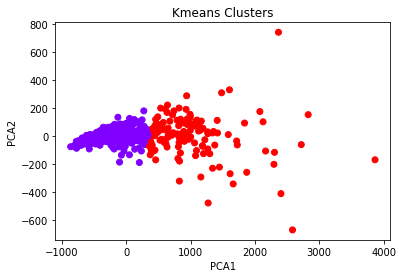

In [167]:
plt.scatter(x[:,0],x[:,1],c=output,cmap='rainbow')
plt.title('Kmeans Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [168]:
print(len(output))

569


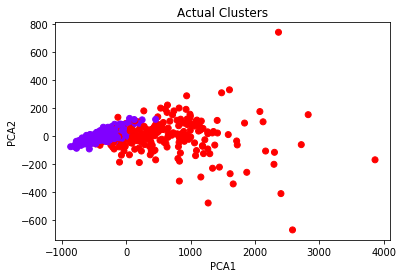

In [169]:
plt.scatter(x[:,0],x[:,1],c=new_final_pca_df['class'],cmap='rainbow')
plt.title('Actual Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

As seen from above two plots, by using kmeans clustering the clusters gets seperated well compared to actual clusters.

## Clustering and classification

Calculate Purity Score

Contigency matrix is matrix that can show the performance of a clustering algorithm.      
It is also called as confusion matrix for clustering task

#refer:- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cluster.contingency_matrix.html

In above function we have made contingency matrix or confusion matrix. TN=356,TP=130,FP=1,FN=82.    
To calculate purity score we have to find the max number in each row of contigency matrix and divide it by sum all the data points in our data set

In [171]:
contingency_matrix = metrics.cluster.contingency_matrix(y, output)
print(contingency_matrix)

[[356   1]
 [ 82 130]]


In [172]:
num=np.sum(np.amax(contingency_matrix, axis=0)) #486
den=np.sum(contingency_matrix) #569
purity_score=num/den   #486/569

In [173]:
print(purity_score)

0.8541300527240774


* The value of Purity score is close to 1 that means the clusters are pure.
* This implies that clusters are very well seperated and can be labelled to perform classification as classification task requires labelled data.
* Train the classifier using these labels as target feature.
* If purity score is 0 or close to 0 then clusters are not pure or not good enough to label data because of cluster overlap.